<a href="https://colab.research.google.com/github/gugasth/time_series_study/blob/main/fft_spectogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
df = pd.read_csv('26.csv', parse_dates=['Iniciado em'])

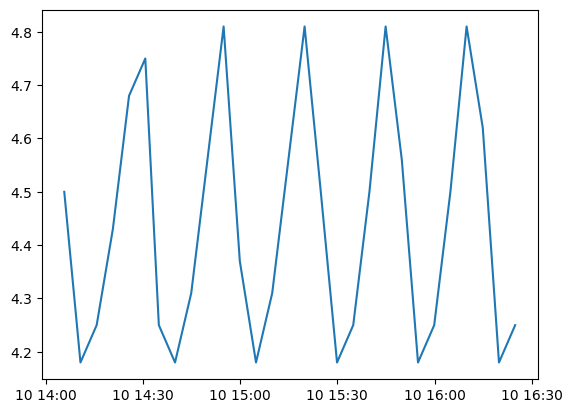

In [125]:
inicio = df['Iniciado em'].min() + timedelta(days=1)
data_destino = inicio + timedelta(days=0.1)
df = df.loc[(inicio <= df['Iniciado em']) & (df['Iniciado em'] < data_destino)]

plt.plot(df['Iniciado em'], df['Valor'])


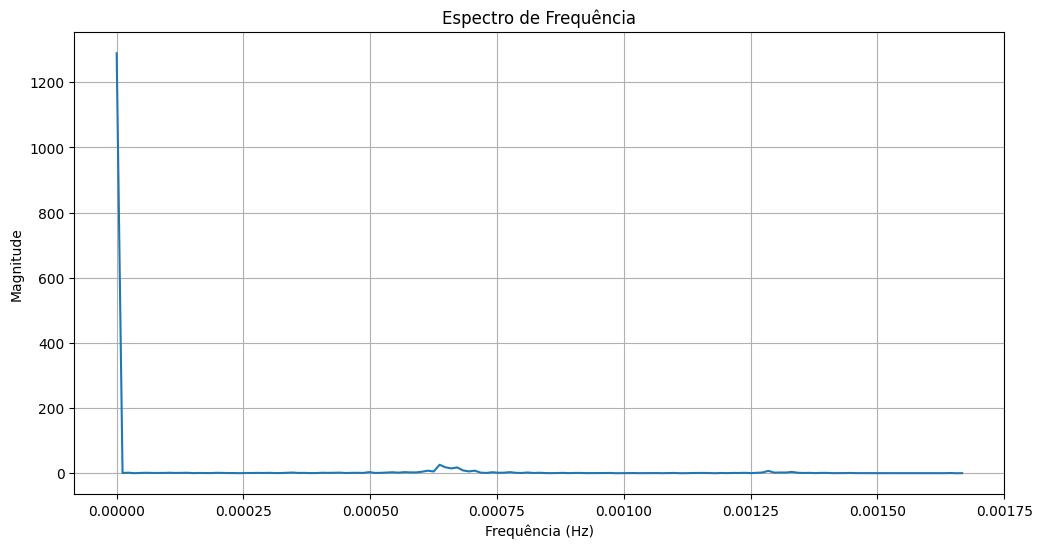

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponha que df seja o seu DataFrame
# Converte a coluna 'Iniciado em' para o formato datetime
df['Iniciado em'] = pd.to_datetime(df['Iniciado em'])

# Calcula a diferença entre os timestamps para obter o intervalo de amostragem
# (assumindo que os timestamps são ordenados corretamente)
sampling_interval = np.mean(np.diff(df['Iniciado em'].values.astype(np.int64))) / 1e9

# Calcula a FFT da coluna 'Valor'
fft_values = np.fft.fft(df['Valor'])

# Calcula as frequências correspondentes
frequencies = np.fft.fftfreq(len(df), sampling_interval)

# Plota o espectro de frequência
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(frequencies)//2])
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectro de Frequência')
plt.grid(True)
plt.show()


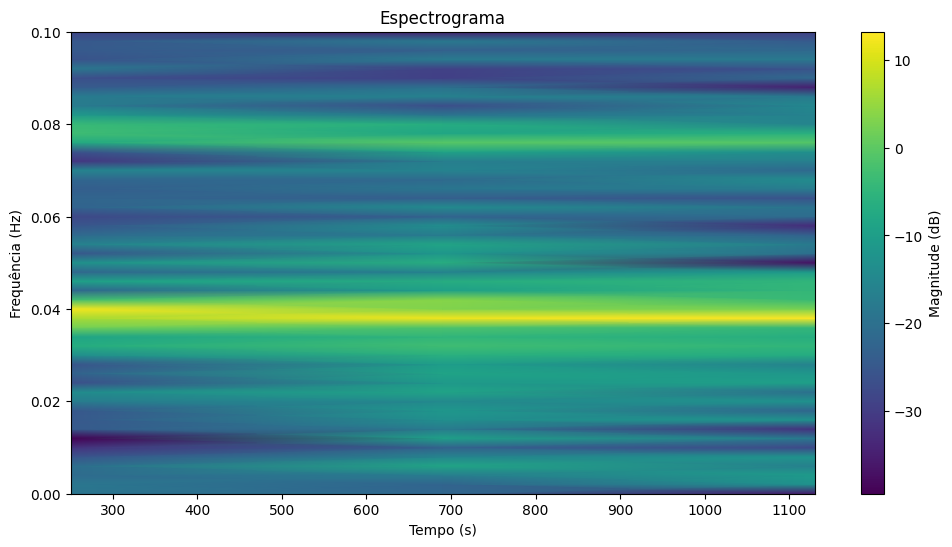

In [115]:
from scipy.signal import spectrogram

# Suponha que df seja o seu DataFrame com timestamps na coluna 'Iniciado em' e valores na coluna 'Valor'
# Converte a coluna 'Iniciado em' para o formato datetime
df['Iniciado em'] = pd.to_datetime(df['Iniciado em'])

# Calcula a diferença entre os timestamps para obter o intervalo de amostragem
# (assumindo que os timestamps são ordenados corretamente)
sampling_interval = 5

# Número de pontos por segmento (tamanho do segmento)
nperseg = 100

# Calcula o espectrograma
frequencies, times, Sxx = spectrogram(df['Valor'], fs=1/sampling_interval, nperseg=nperseg)

# Plota o espectrograma
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10*np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequência (Hz)')
plt.xlabel('Tempo (s)')
plt.title('Espectrograma')
plt.colorbar(label='Magnitude (dB)')
plt.show()
